<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Support Vector Machine Model

### Initializations

In [319]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
%matplotlib inline

In [320]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [296]:
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [297]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Support Vector Machine

In [298]:
svm = SVC()

In [300]:
'''
mit kernel='linear' score = 0.7917

mit kernel='poly' score = 0.7733 und degree=3; mit degree=2 score=0.8187; mit degree=1 score=0.7892; 
mit degree=4 score = 0.7696; danach bleibt es bei 0.7696
Degree wird nur von Poly berücksichtigt 

mit kernel='sigmoid' score = 0.7792

mit kernel='rbf' ohne/mit shrinking=False score=0.8475
ändern der cache_size keinen unterschied
ob decision_function_shape='ovr'bzw 'ovo' bleibt gleich
'''

"\nmit kernel='linear' score = 0.7917\n\nmit kernel='poly' score = 0.7733 und degree=3; mit degree=2 score=0.8187; mit degree=1 score=0.7892; \nmit degree=4 score = 0.7696; danach bleibt es bei 0.7696\nDegree wird nur von Poly berücksichtigt \n\nmit kernel='sigmoid' score = 0.7792\n\nmit kernel='rbf' ohne/mit shrinking=False score=0.8475\nändern der cache_size keinen unterschied\n"

In [301]:
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [302]:
svm.score(X_test_scaled, y_test)

0.84750000000000003

In [113]:
predictions = svm.predict(X_test_scaled)

In [114]:
print("Train Accuracy :: ", accuracy_score(y_train, svm.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.831753307636
Test Accuracy  ::  0.8475


In [115]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1818   29]
 [ 337  216]]


In [116]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1821,   26],
       [  57,  496]], dtype=int64), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1790,   57],
       [ 182,  371]], dtype=int64), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]], dtype=int64), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]], dtype=int64), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]], dtype=int64), 'label': 'Support Vector Machine'}}


In [117]:
cm_dict.item().update({'svm':{'cm': cm, 'label': 'Support Vector Machine' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1821,   26],
       [  57,  496]], dtype=int64), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1790,   57],
       [ 182,  371]], dtype=int64), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]], dtype=int64), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]], dtype=int64), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]], dtype=int64), 'label': 'Support Vector Machine'}}


In [118]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.84      0.98      0.91      1847
          1       0.88      0.39      0.54       553

avg / total       0.85      0.85      0.82      2400



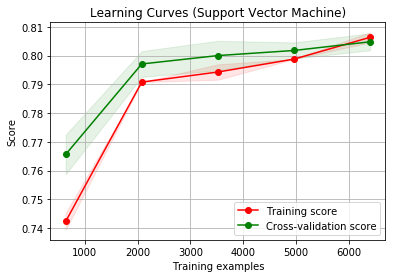

In [119]:
title = 'Learning Curves (Support Vector Machine)'
estimator = svm
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Use Random Forest w/o Department

In [321]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [322]:
svm = clf = svm.SVC()

In [323]:
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [324]:
svm.score(X_test_scaled, y_test)

0.90041666666666664

### Use Support Vector Machine w/o Department

In [55]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [56]:
svm = SVC()

In [57]:
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
svm.score(X_test_scaled, y_test)

0.90041666666666664

In [59]:
predictions = svm.predict(X_test_scaled)

In [60]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1790   57]
 [ 182  371]]


In [61]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1813,   34],
       [  21,  532]]), 'label': 'Nearest Neighbor'}}


In [62]:
cm_dict.item().update({'svm':{'cm': cm, 'label': 'Support Vector Machine' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1813,   34],
       [  21,  532]]), 'label': 'Nearest Neighbor'}}


In [63]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1847
          1       0.87      0.67      0.76       553

avg / total       0.90      0.90      0.90      2400



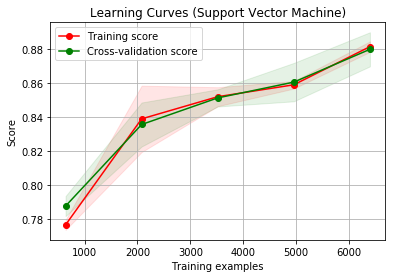

In [64]:
title = 'Learning Curves (Support Vector Machine)'
estimator = svm
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [69]:
svm = SVC()

In [91]:
param_space = {'kernel':[ 'poly', 'rbf', 'sigmoid'], 'degree':[1,3,5,10,20]}

In [92]:
gs = GridSearchCV(svm, param_space, cv=5, n_jobs=8)

In [93]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'kernel': ['poly', 'rbf', 'sigmoid'], 'degree': [1, 3, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


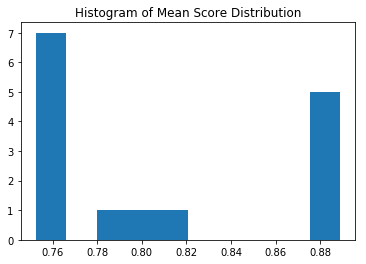

In [94]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [95]:
gs.best_score_

0.88894676528805083

In [96]:
gs.best_params_

{'degree': 1, 'kernel': 'rbf'}

In [97]:
svm = SVC(kernel='rbf')

In [98]:
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [99]:
svm.score(X_test_scaled, y_test)

0.90041666666666664

In [100]:
predictions = svm.predict(X_test_scaled)

In [101]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1790   57]
 [ 182  371]]


In [61]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1813,   34],
       [  21,  532]]), 'label': 'Nearest Neighbor'}}


In [62]:
cm_dict.item().update({'svm':{'cm': cm, 'label': 'Support Vector Machine' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1813,   34],
       [  21,  532]]), 'label': 'Nearest Neighbor'}}


In [63]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1847
          1       0.87      0.67      0.76       553

avg / total       0.90      0.90      0.90      2400



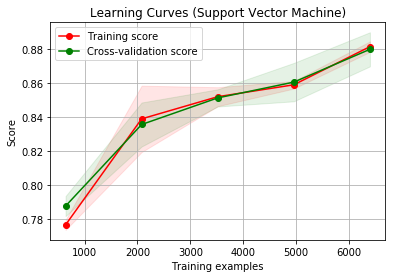

In [64]:
title = 'Learning Curves (Support Vector Machine)'
estimator = svm
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()